In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
HR = pd.read_csv("HR_comma_sep.csv")
HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


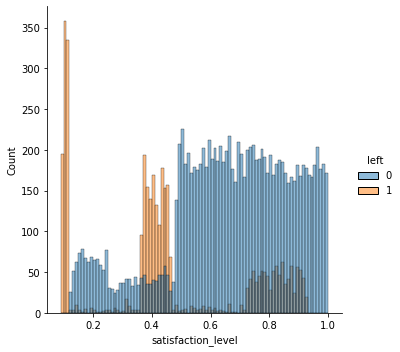

In [39]:
sns.displot(x=HR['satisfaction_level'],hue = HR['left'],binwidth = 0.01)

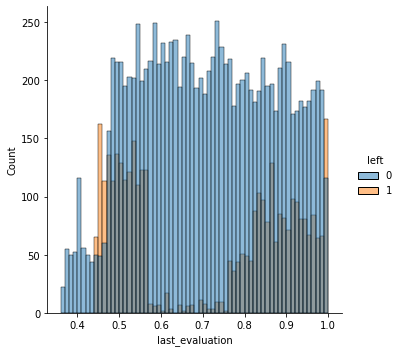

In [23]:
sns.displot(x=HR['last_evaluation'],hue = HR['left'],binwidth = 0.01)

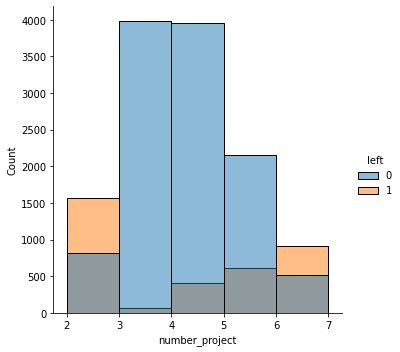

In [24]:
sns.displot(x=HR['number_project'],hue = HR['left'],binwidth = 1)

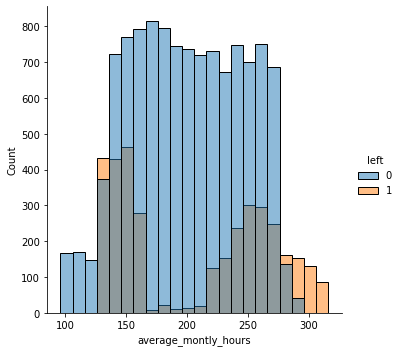

In [25]:
sns.displot(x=HR['average_montly_hours'],hue = HR['left'],binwidth = 10)

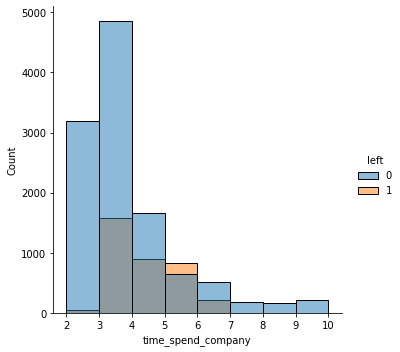

In [27]:
sns.displot(x=HR['time_spend_company'],hue = HR['left'],binwidth = 1)

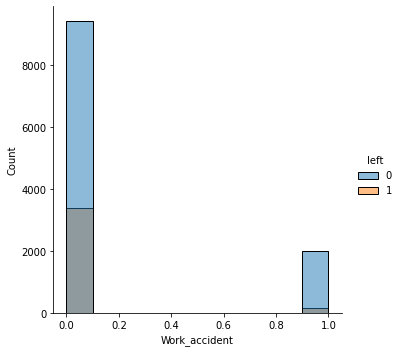

In [30]:
sns.displot(x=HR['Work_accident'],hue = HR['left'],binwidth = 0.1)

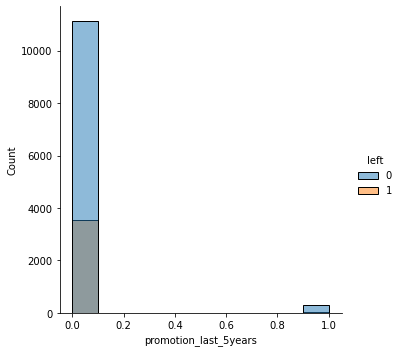

In [32]:
sns.displot(x=HR['promotion_last_5years'],hue = HR['left'],binwidth = 0.1)

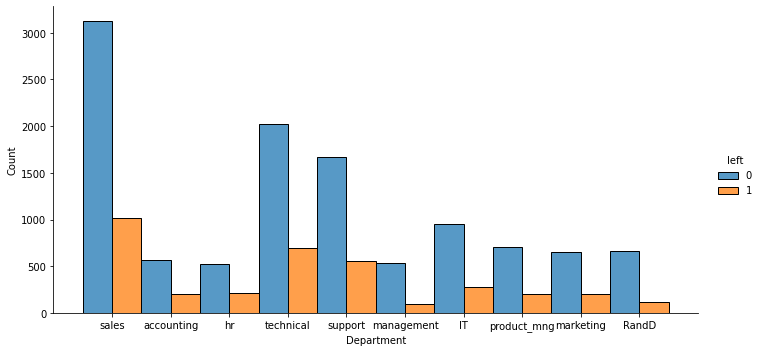

In [53]:
sns.displot(x=HR['Department'],hue = HR['left'],aspect = 2,multiple="dodge")

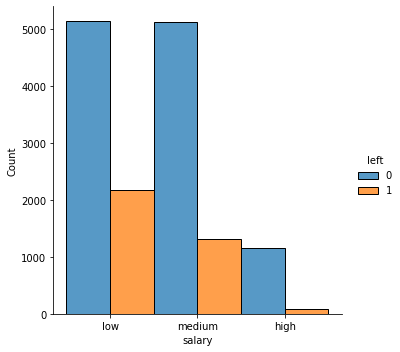

In [116]:
sns.displot(x=HR['salary'],hue = HR['left'],aspect = 1,multiple="dodge")

In [117]:
HR.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [119]:
HR.groupby('left').std()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
1,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759


In [77]:
salary_dummies = pd.get_dummies(HR.salary,prefix = "salary")
salary_dummies.head()


,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [78]:
HR_new = pd.concat([HR,salary_dummies],axis = 1)
HR_new.drop("salary",axis = 1)
HR_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [57]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train,y_test = train_test_split(HR_new[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low','salary_medium']],HR_new.left,train_size = 0.75)

In [108]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
11389,0.16,182,0,0,1,0
1295,0.38,139,0,0,1,0
2558,0.53,248,0,0,0,1
11621,0.91,240,0,0,0,1
3580,0.61,250,0,0,1,0
...,...,...,...,...,...,...
2853,0.55,267,0,0,1,0
6989,0.68,182,0,0,0,1
1801,0.11,264,0,0,1,0
14569,0.31,135,0,0,1,0


In [113]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
model.score(X_train,y_train)


0.7727798026491244